<a href="https://colab.research.google.com/github/TayaneMaciel/cv2/blob/main/regress%C3%A3o_linear.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORTAÇÕES
import pandas as pd

In [ ]:
dados = pd.read_excel('/content/drive/MyDrive/programaria - dados/analise_dados_mod7_(1).xlsx')

Vamos filtrar apenas pessoas que são empregadas do tipo CLT. Para confirmar os nomes das colunas começamos com o columns:

In [ ]:
dados.columns

Index(['ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA', 'PCD',
       'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO', 'NOVO_NIVEL', 'NIVEL_Júnior', 'NIVEL_Pleno', 'NIVEL_Sênior',
       'GEARACAO', 'Quanto tempo de experiência na área de dados você tem?',
       'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?',
       'Você está satisfeito na sua 

A coluna a ser usada sera a 'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?'

In [ ]:
dados['QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?'].value_counts()  #para ver os tipos de valores

,count
QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?,
Empregado (CLT),2762
Empreendedor ou Empregado (CNPJ),410
"Desempregado, buscando recolocação",350
Estagiário,188
Servidor Público,156
Trabalho na área Acadêmica/Pesquisador,86
Somente Estudante (graduação),82
Vivo no Brasil e trabalho remoto para empresa de fora do Brasil,69
Vivo fora do Brasil e trabalho para empresa de fora do Brasil,46


In [ ]:
#vamos filtrar
dados = dados[dados['QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?']== 'Empregado (CLT)']

In [ ]:
#value counts em dados para conferir o filtro
dados['QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?'].value_counts()

,count
QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?,
Empregado (CLT),2762


Agora vamos dar uma olhada na coluna de COR/RACA/ETNIA. E vamos 'limpar' categorias com poucos dados, para não alterar as medias. Ex: indigenas, prefiro nao informar, etc

In [ ]:
dados['COR/RACA/ETNIA'].value_counts()

,count
COR/RACA/ETNIA,
Branca,1805
Parda,661
Preta,181
Amarela,85
Prefiro não informar,16
Outra,10
Indígena,4


In [ ]:
#criar lista para retirar
lista_retirar = ['Prefiro não informar', 'Outra', 'Indígena']

In [ ]:
#vamos usar a função isin (esta em), mas como quero a negação (não está em) usamos o ~
dados = dados[~dados['COR/RACA/ETNIA'].isin(lista_retirar)]

Agora vamos criar uma coluna chamada *COR NAO BRANCA*, onde se a coluna de COR/RACA/ETNIA for BRANCA ela recebe 0. Caso contrario, ela recebe 1.

In [ ]:
#vamos usar o apply
dados['NÃO BRANCA'] = dados['COR/RACA/ETNIA'].apply(lambda x: 1 if x!= 'Branca' else 0 )

<ipython-input-10-5c168e7396f3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['NÃO BRANCA'] = dados['COR/RACA/ETNIA'].apply(lambda x: 1 if x!= 'Branca' else 0 )


Outro parametro que vamos usar, é o da coluna 'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?

In [ ]:
dados['QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?'].value_counts()

,count
QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?,
de 1 a 2 anos,743
de 3 a 4 anos,584
de 4 a 6 anos,416
Menos de 1 ano,353
Mais de 10 anos,277
de 7 a 10 anos,232
Não tenho experiência na área de dados,127


Vamos criar um código para usar o primeiro valor numérico de cada categoria (**ex**:*na opção de 1 a 2 anos, pegamos o digito 1*).
A gente pode fazer isso usando uma função chamada **extract**.



In [ ]:
dados['TEMPO DE EXPERIENCIA'] = dados['QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?'].str.extract(r'(\d+)') #regex dentro da função

<ipython-input-12-05b3cfed3ed6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['TEMPO DE EXPERIENCIA'] = dados['QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?'].str.extract(r'(\d+)') #regex dentro da função


In [ ]:
dados['TEMPO DE EXPERIENCIA'].value_counts()

,count
TEMPO DE EXPERIENCIA,
1,1096
3,584
4,416
10,277
7,232


In [ ]:
#Vamos conferir a coluna de funcionarios
dados['NUMERO DE FUNCIONARIOS'].value_counts()

,count
NUMERO DE FUNCIONARIOS,
Acima de 3.000,1313
de 101 a 500,503
de 1.001 a 3.000,368
de 501 a 1.000,248
de 51 a 100,146
de 11 a 50,112
de 6 a 10,24
de 1 a 5,18


para usar o extract como no anterior, usando o regex como da ultima vez, a seleção pararia no . em casos como 3.000 ( o regex pegava digito pos digito).
*Aqui vamos usar o replace para tirar os pontos e substituir por um espaço:*

In [ ]:
dados['NUMERO DE FUNCIONARIOS'] = dados['NUMERO DE FUNCIONARIOS'].str.replace('.','')

<ipython-input-15-78a3feb39aa4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['NUMERO DE FUNCIONARIOS'] = dados['NUMERO DE FUNCIONARIOS'].str.replace('.','')


In [ ]:
dados['NUMERO DE FUNCIONARIOS'].value_counts()

,count
NUMERO DE FUNCIONARIOS,
Acima de 3000,1313
de 101 a 500,503
de 1001 a 3000,368
de 501 a 1000,248
de 51 a 100,146
de 11 a 50,112
de 6 a 10,24
de 1 a 5,18


In [ ]:
dados['NUMERO DE FUNCIONARIOS'] = dados['NUMERO DE FUNCIONARIOS'].str.extract(r'(\d+)')

<ipython-input-17-de65999fa8a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados['NUMERO DE FUNCIONARIOS'] = dados['NUMERO DE FUNCIONARIOS'].str.extract(r'(\d+)')


In [ ]:
dados['NUMERO DE FUNCIONARIOS'].value_counts()

,count
NUMERO DE FUNCIONARIOS,
3000,1313
101,503
1001,368
501,248
51,146
11,112
6,24
1,18


Agora, vamos pesquisar se tem valores NULOS nessas duas colunas: TEMPO DE EXPERIENCIA e NUMERO DE FUNCIONARIOS. Isso é feito da seguinte forma:

In [ ]:
dados['TEMPO DE EXPERIENCIA'].value_counts(dropna=False)

,count
TEMPO DE EXPERIENCIA,
1,1096
3,584
4,416
10,277
7,232
NaN,127


In [ ]:
dados['NUMERO DE FUNCIONARIOS'].value_counts(dropna=False)

,count
NUMERO DE FUNCIONARIOS,
3000,1313
101,503
1001,368
501,248
51,146
11,112
6,24
1,18


Temos 127 nulos em TEMPO DE EXPERIENCIA, mas eles são provenientes do campo 'Não tenho experiencia na area de dados'. Então podemos preencher esse campo com 0, ja que não há experiencia. Usamos o ***fillna***

In [ ]:
dados['TEMPO DE EXPERIENCIA'] =  dados['TEMPO DE EXPERIENCIA'].fillna(0)

A próxima coluna que usaremos é a de insatisfação dos funcionários com a empresa atual, que lista os motivos. Vamos usar o value_counts() para ver como está:

In [ ]:
dados['Qual o principal motivo da sua insatisfação com a empresa atual?'].value_counts()

,count
Qual o principal motivo da sua insatisfação com a empresa atual?,
Gostaria de trabalhar em em outra área de atuação,69
Salário atual não corresponde ao mercado,53
Falta de oportunidade de crescimento no emprego atual,46
Falta de maturidade analítica na empresa,45
"Falta de oportunidade de crescimento no emprego atual, Salário atual não corresponde ao mercado, Falta de maturidade analítica na empresa",26
...,...
Trabalho explora pouco minhas habilidades e me dá poucas oportunidades de atuação distintas,1
Quero trabalhar de casa,1
"Não tenho uma boa relação com meu líder/gestor, Gostaria de trabalhar em em outra área de atuação",1


Muitos dos campos envolvem insatisfação com salário. Nós vamos filtrar o que é insatisfação com salario, do que não é. Então, vamos criar uma coluna chamada INSATISFAÇÃO

In [ ]:
dados['INSATISFACAO'] = 0

Agora vamos fazer um filtro usando o loc

In [ ]:
dados.loc[dados['Qual o principal motivo da sua insatisfação com a empresa atual?'].notnull(),'INSATISFACAO'] = dados.loc[dados['Qual o principal motivo da sua insatisfação com a empresa atual?'].notnull(),'Qual o principal motivo da sua insatisfação com a empresa atual?'].apply(lambda x: 1 if 'Salário' in x else 0 )

In [ ]:
dados['INSATISFACAO'] =  dados['INSATISFACAO'].fillna(0)

In [ ]:
dados['INSATISFACAO'].value_counts()

,count
INSATISFACAO,
0,2453
1,279


A ultima coluna que vamos trabalhar é a de NIVEL DE ENSINO, fazendo um value_counts() podemos dar uma olhada.

In [ ]:
dados['NIVEL DE ENSINO'].value_counts()

,count
NIVEL DE ENSINO,
Graduação/Bacharelado,1024
Pós-graduação,975
Mestrado,306
Estudante de Graduação,271
Doutorado ou Phd,100
Não tenho graduação formal,52
Prefiro não informar,4


Podemos associar essas dados da seguinte forma:
Não tenho graduação formal: 0
Estudante de Graduação : 1
Graduação: 2
e assim por diante

Podemos fazer isso com o apply:

In [ ]:
dados['NIVEL DE ENSINO']= dados['NIVEL DE ENSINO'].apply(lambda x:0 if x == 'Não tenho graduação formal' else
                               1 if x =='Estudante de Graduação' else
                               2 if x == 'Graduação/Bacharelado' else
                               3 if x == 'Pós-graduação' else
                               4 if x == 'Mestrado' else
                               5 if x =='Doutorado ou Phd' else -1)

*Fizemos as alterações que foram necessarias nas colunas individuais* ✨

Agora podemos fazer a seleção das colunas que vamos utilizar para o modelo: *OS ATRIBUTOS DO NOSSO MODELO*


In [ ]:
#Vamos dar uma olhadinha nos nomes das colunas todas:
dados.columns

Index(['ID', 'IDADE', 'FAIXA IDADE', 'GENERO', 'COR/RACA/ETNIA', 'PCD',
       'EXPERIENCIA_PROFISSIONAL_PREJUDICADA', 'ASPECTOS_PREJUDICADOS',
       'VIVE_NO_BRASIL', 'ESTADO ONDE MORA', 'UF ONDE MORA',
       'REGIAO ONDE MORA', 'MUDOU DE ESTADO?', 'REGIAO DE ORIGEM',
       'NIVEL DE ENSINO', 'ÁREA DE FORMAÇÃO',
       'QUAL SUA SITUAÇÃO ATUAL DE TRABALHO?', 'SETOR',
       'NUMERO DE FUNCIONARIOS', 'GESTOR?', 'CARGO COMO GESTOR', 'CARGO ATUAL',
       'FAIXA SALARIAL',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE DADOS VOCÊ TEM?',
       'QUANTO TEMPO DE EXPERIÊNCIA NA ÁREA DE TI/ENGENHARIA DE SOFTWARE VOCÊ TEVE ANTES DE COMEÇAR A TRABALHAR NA ÁREA DE DADOS?',
       'SALARIO', 'NOVO_NIVEL', 'NIVEL_Júnior', 'NIVEL_Pleno', 'NIVEL_Sênior',
       'GEARACAO', 'Quanto tempo de experiência na área de dados você tem?',
       'Quanto tempo de experiência na área de TI/Engenharia de Software você teve antes de começar a trabalhar na área de dados?',
       'Você está satisfeito na sua 

In [ ]:
dados= dados[['IDADE','GENERO','NÃO BRANCA','TEMPO DE EXPERIENCIA', 'INSATISFACAO', 'SETOR','REGIAO ONDE MORA',
              'NIVEL DE ENSINO', 'NUMERO DE FUNCIONARIOS', 'SALARIO', 'NOVO_NIVEL']]

In [ ]:
dados.columns

Index(['IDADE', 'GENERO', 'NÃO BRANCA', 'TEMPO DE EXPERIENCIA', 'INSATISFACAO',
       'SETOR', 'REGIAO ONDE MORA', 'NIVEL DE ENSINO',
       'NUMERO DE FUNCIONARIOS', 'SALARIO', 'NOVO_NIVEL'],
      dtype='object')

Agora vamos utilizar o get dummies para as colunas de genero, regiao onde mora, novo nivel e setor . Nesse caso usaremos realmente get dummies pois essas variaveis não tem uma ordenação. Por exemplo, eu não posso falar que masculino vale mais que feminino. E como o modelo vai criar multiplicadores para cada variavel, não faria sentido ter valores numericos aqui. A gente poderia substituir por valores, mas como tb estao fazendo analise das importancias, acabaria influenciando na nossa analise final.  

**obs** o get_dummies é uma função da biblioteca PANDAS que vai 'transformar os valores em booleanos. Usando 1 e 0 para indicar True e false'


In [ ]:
dados = pd.get_dummies(dados, columns = ['GENERO', 'REGIAO ONDE MORA', 'SETOR', 'NOVO_NIVEL'], drop_first= True)

e nós atribuimos esse resultado a DADOS

Agora temos a tabela com os dados, mas antes de criar o modelo em si, precisamos separar nosso conjuto de dados em dois. Uma parte vai ser o conjunto de treinamento (é utilizado pelo modelo para aprender) e a outra parte vai ser o conjunto de teste ( utilizado para avaliar o desempenho do modelo para os dados que o modelo ainda não viu).
**Então primeiro vamos SEPARAR os ATRIBUTOS do nosso objetivo**

In [ ]:
X = dados.drop('SALARIO', axis = 1) #apagando SALARIO, axis indica a coluna
y = dados['SALARIO'] #peguei só a coluna de salario

A variavel X recebeu todas as variaveis exceto SALARIO, enquanto a variavel Y recebeu apenas a variavel SALARIO.
***Para fazer a separação dos conjuntos de TESTE e TREINO, vamos utilizar uma função do Sklearn, tambem cahamada de TRAIN TEST SPLIT.***


A GENTE FAZ O IMPORT ASSIM:

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# a gente chama a função diretamente, e dentro dos parenteses colocamos os parametros --
#target e alvo, depois test_size: tamanho do conjunto de teste (recebe valor em porcentagem-- ex 20% é 0.2), o ultimo parametro é
# random state --> semente para gerador de numeros aleatorios que garante que a divisao dos dados seja reproduzivel (so usar o msm numero)
# o resultado dessa função vai ser dois conjuntos de atributos, um para teste e um para treinamento
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

Tambem sera necessario usar uma função chamada **Standard Scaler**, que tambem é da biblioteca sklearn. Fazemos o import assim:

In [ ]:
from sklearn.preprocessing import StandardScaler

Essa função tem como objetivo padronizar as características, removendo a media e escalando para variancia unitaria. Ou seja, vai normalizar nossos dados. É importante fazer isso pq algoritmos de machine learning, como regressao linear e redes neurais, funcionam melhor quando os dados tem uma escala uniforme.

In [ ]:
scaler = StandardScaler ()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

Agora vamos TREINAR O MODELO. Utilizaremos o *modelo de Linear Regression* da biblioteca *sklearn* .

Fazemos o import desse linear regression assim:

In [ ]:
from sklearn.linear_model import LinearRegression

a gente cria o objeto dessa regressão linear:

In [ ]:
model = LinearRegression()

Agora vamos treinar. Para isso chamamos o modelo, colocamos a função de fit e dentro do fit colocamos os parametros

In [ ]:
model.fit(X_train_scaled, y_train) #os atributos sao os: parametros de treino e parametros de resposta

LinearRegression()

Não normalizamos nosso target - SALARIO. Pois queremos o resultado em formato de salario msm.

A gente pode fazer as predições do nosso conjunto de testes utilizando a função do *predict*

In [ ]:
model.predict(X_test_scaled)

array([21747.09955485, 16393.11133947,  3322.57047577,  4070.47453441,
       17456.19496593,  6983.80212226,  2895.99031002, 13153.66461021,
        2877.9092721 , 11369.42506472,  8810.37673337,  8889.0254039 ,
        8208.14893701, 18222.19249943, 18043.82669965,  8547.27229238,
       10852.30444684,  6617.36584584,  4625.9954692 , 13323.22681603,
        7195.39308176, 11065.52644244, 18377.46883881,  9352.55542353,
        9167.82728996, 22734.71129187,  9753.50647653, 11639.15276746,
       10102.19278383, 19826.59479755, 13074.70339455, 12732.60397625,
       18814.72054547,  5688.02809659,  5513.0550523 ,  3798.25066321,
       16433.57854552,  9712.53760549, 11600.32636999,  3345.07582467,
        7962.7143068 ,  8704.55524691,  5210.72145032,  6547.51938246,
       13349.11767882, 11420.03453199, 14284.61387643,  1406.89023734,
        5841.75882136, 23072.17785964,  8973.76843396, 10897.99012048,
       19191.98953638,  8864.87517892, 18019.58277215, 13090.32115152,
      

Cada valor desse, representa um valor de salario que o modelo predisse para cada atributo. Vamos pegar esses resultados e colocar numa variavel (y_pred)

In [ ]:
y_pred = model.predict(X_test_scaled)

Após treinar o modelo de machine learning, é essencial avaliar o desempenho dele para entender o quao bem ele esta fazendo suas predições. Duas métricas comuns para avaliação de modelos de regressão são:
*Erro quadratico médio **MSE** * e *coeficiente de determinação*.

--***MSE*** : Calcula a média de diferença entre o valor predito e o valor real. --  *ENTRETANDO NESSA METRICA O VALOR É ELEVADO AO QUADRADO, PARA PENALIZAR VALORES MT DIFERENTES ENTRE VALOR PREVISTO E REAL*

JÁ O **R²** É UMA MEDIDA ESTATISTICA DE *QUAO PROXIMOS* OS DADOS ESTÃO DA LINHA DE REGRESSAO. -> **PORCENTAGEM DA VARIAÇÃO DA VARIAVEL RESPOSTA QUE É EXPLICADO POR UM MODELO LINEAR**. ESTÁ SEMPRE 0 E 100%.


SENDO **0%** : NAO EXPLICA NADA DA VARIABILIDADE DOS DADOS DE RESPOSTA AO REDOR DA SUA MÉDIA.

**100%** : INDICA QUE O MODELO EXPLICA TODA VARIABILIDADE DOS DADOS DE RESPOSTA AO REDOR DA SUA MÉDIA, OU SEJA, O FOCO É O 100%.


***ESSAS FUNÇÕES SÃO DABIBLIOTECA SKLEARN***
FAZEMOS A IMPORTAÇÃO ASSIM:

In [ ]:
#vamos fazer o import de 3 funções de uma msm biblioteca
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

Vamos cacular primeiro o erro quadratico médio (MSE):

In [ ]:
#DIFERENÇA ENTRE VALORES REAIS (y_test)E OS PREDITOS (y_pred) -- qto menor, mais preciso
mse = mean_squared_error(y_test,y_pred)

In [ ]:
mse

23048733.97829721

Esse valor alto do MSE indica que o modelo não esta com predições precisas. Mas no nosso caso, como os erros sao penalizados exponencialmente ( erros maiores - penalizações maiores), se ele faz apenas uma predição MUITO ruim => MSE eleva ao quadrado.
Além disso, a escala do MSE Nao e a msm do nosso target ( salario ).

Entao, ao inves do MSE vamos calcular a **MAE** ( erro absoluto médio)

* vamos pegar so a diferença entre o valor predito e o valor real ( nao e elevado ao quadrado.

In [ ]:
mae = mean_absolute_error(y_test, y_pred)

In [ ]:
mae

3298.9644642069397

In [ ]:
r2 = r2_score(y_test, y_pred)

In [ ]:
r2

0.5297347873934931

Para saber se nosso modelo esta bom, precisamos analisar as metricas em conjunto. Temos um R2 de 0.52, um MAE de 3298 e MSE de 23 milhoes. Nas medias absolutas os erros nao sao tao altos, pois 3mil paras as taxas salariais que temos é ate um MSE bem aceitavel. Porem o MSE esta mt alto -> bastante erros.Para um modelo real de produção, não seria aceitavel.

**VAMOS MONTAR UM GRÁFICO DOS VALORES REAIS x VALORES PREDITOS**

In [ ]:
import matplotlib.pyplot as plt

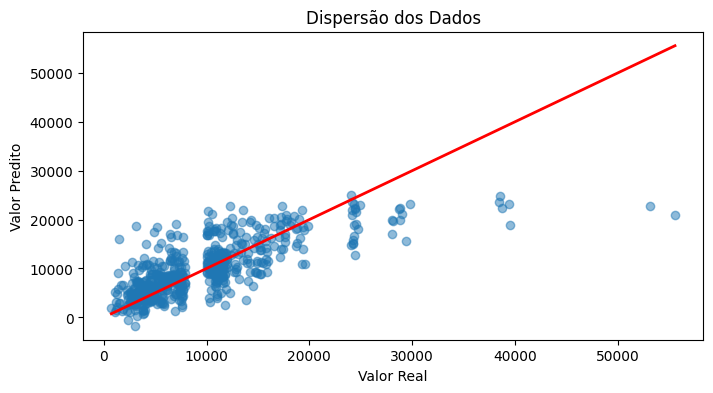

In [ ]:
#vamos montar o grafico, começando com a nova figura
plt.figure(figsize = (8,4))
#vamos plotar um gráfico de dispersão - definiremos a transparencia dos pontos c alpha
plt.scatter(y_test, y_pred, alpha =0.5)
#rotulos
plt.xlabel('Valor Real')
plt.ylabel("Valor Predito")
plt.title('Dispersão dos Dados')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color = 'red', linewidth=2) #plt.plto vai criar a reta da regressão
#os argumentos são: ponto de inicio e ponto final d reta, cor e espessura
plt.show()

Nesse grafico, a linha *vermelha* repressenta nosso modelo de *regressão linear* (Valores Preditos) , as bolinhas *azuis* são os *valores reais*.
Até aprox. 20 mil, temos muitos valores reais proximos ao modelo de regressão ( as bolinhas estão próximas da linha). Porém, acima de 20 mil reais, as bolinhas estão bem distante da linha. Elas seguem um padrão mais achatado. Significa que, ou podemos tentar no modelo uma inclinação menor, ou realmente regressão linear não é um modelo adequado para nosso problema.
Porem, como no nosso caso, o objetivo é fazer uma analise das relações com salário e, na maioria dos casos, conseguimos uma relação próxima, usaremos esse modelo mesmo.

**Nós podemos ver também quais atributos tiveram mais peso positivo ou negativo para o resultado do modelo**

Então vamos pegar os nomes das colunas usadas e atribuir a variáveis:

In [ ]:
nomes_atributos = X_train.columns

In [ ]:
nomes_atributos

Index(['IDADE', 'NÃO BRANCA', 'TEMPO DE EXPERIENCIA', 'INSATISFACAO',
       'NIVEL DE ENSINO', 'NUMERO DE FUNCIONARIOS', 'GENERO_Masculino',
       'GENERO_Prefiro não informar', 'REGIAO ONDE MORA_Nordeste',
       'REGIAO ONDE MORA_Norte', 'REGIAO ONDE MORA_Sudeste',
       'REGIAO ONDE MORA_Sul', 'SETOR_Educação',
       'SETOR_Entretenimento ou Esportes', 'SETOR_Filantropia/ONG's',
       'SETOR_Finanças ou Bancos', 'SETOR_Indústria',
       'SETOR_Internet/Ecommerce', 'SETOR_Marketing', 'SETOR_Outra Opção',
       'SETOR_Seguros ou Previdência', 'SETOR_Setor Alimentício',
       'SETOR_Setor Automotivo', 'SETOR_Setor Farmaceutico',
       'SETOR_Setor Imobiliário/ Construção Civil', 'SETOR_Setor Público',
       'SETOR_Setor de Energia', 'SETOR_Tecnologia/Fábrica de Software',
       'SETOR_Telecomunicação', 'SETOR_Varejo', 'SETOR_Área da Saúde',
       'SETOR_Área de Consultoria', 'NOVO_NIVEL_Pessoa Gestora',
       'NOVO_NIVEL_Pleno', 'NOVO_NIVEL_Sênior'],
      dtype='object')

Vamos criar um dataframe com pandas (tabela) - *Ela vai ter como valores os coeficientes do modelo*

acessado assim:

In [ ]:
coefs = pd.DataFrame(model.coef_,columns =['coeficientes'], index = nomes_atributos)

Vamos ordenar essa coluna de coeficientes, para a gente ver melhor o que está influenciando mais ou o que está influenciando menos--> sort values

In [ ]:
coefs = coefs.sort_values(by='coeficientes', ascending=False)

Para ficar melhor ainda, podemos plotar um gráfico de barra horizontal.

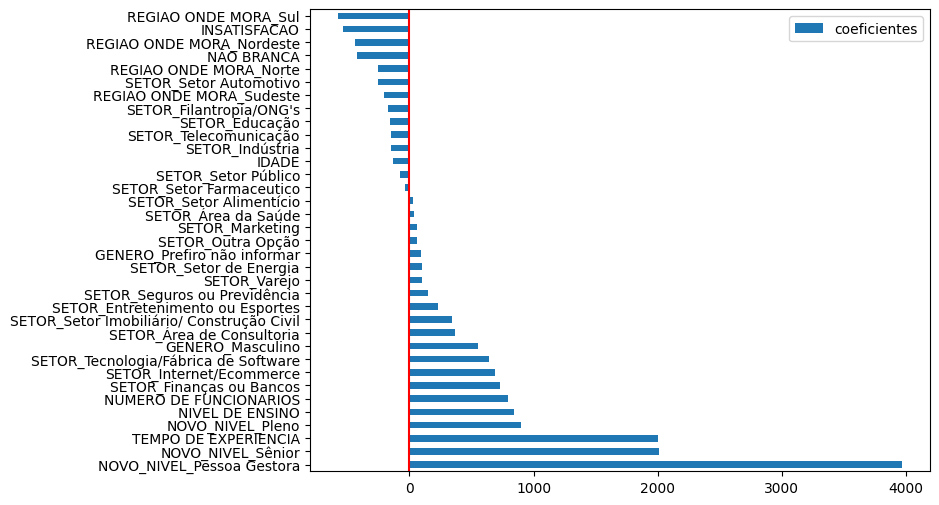

In [ ]:
coefs.plot.barh(figsize=(8,6))
plt.axvline(x=0, color='red') #definir uma linha no eixo vertical para mostrar onde fica positivo/negativo

O que está como 'negativo' seriam fatores que influenciam negativamente no valor do Salário.
O que está 'positivo' são os que influenciam positivamente.